### Autores
Juliana Bourdieu bourdieujuliana@gmail.com

Gonzalo Martinez gonzalof95@hotmail.com

In [1]:
#Importancion de modulos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sp

In [2]:
#Configuracion de parametros de los graficos
plt.rcParams["figure.figsize"] = (11,7)
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'mathtext.default': 'regular' })

In [3]:
#Definicion de simbolos
D = sp.symbols('D') #Largo del medio activo
L_1 = sp.symbols('L1') #Largo del primer brazo
L_2 = sp.symbols('L2') #Largo del segundo brazo
R_1 = sp.symbols('R1') #Reflectividad del primer espejo
R_2 = sp.symbols('R2') #Reflectividad del segundo espejo
n_1 = sp.symbols('n') #Indice de refracción del medio activo
l = sp.symbols('l')  #Parametro a variar
tita = sp.symbols('\\theta') #Angulo de la cavidad
#Reflectividad para cada plano
R_2_x = R_2*sp.cos(tita/2) 
R_2_y = R_2/sp.cos(tita/2)
#Definicion de matricez ABCD para cada elemento
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2-l],[0,1]])
matriz_l = sp.Matrix([[1,l],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[0,1]])
matriz_R2_x = sp.Matrix([[1,0],[-2/R_2_x,1]])
matriz_R2_y = sp.Matrix([[1,0],[-2/R_2_y,1]])
matriz_R3 = sp.Matrix([[1,0],[0,1]])
#RoundTrip para cada plano 
camino_x = matriz_l*matriz_l*matriz_L2*matriz_R2_x*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_x*matriz_L2
camino_y = matriz_l*matriz_l*matriz_L2*matriz_R2_y*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_y*matriz_L2

In [4]:
def w(ll, A,B,C,D, lamnda=0.001064,n=1):
    """
    Funcion para calcular la cintura del laser en un punto ll
    Argumentos:
        ll: punto donde se quiere evaluar
        A,B,C,D: simbolos de sympy de los elementos de la matriz ABCD de un roundtrip
        lambda: longitud de onda del laser
        n: indice de refraccion del medio, en este caso es 1 porque se trabja siempre en aire
    """
    #Se Evalua cada elemento en el punto ll
    A = float(A.subs(l,ll))
    B = float(B.subs(l,ll))
    C = float(C.subs(l,ll))
    D = float(D.subs(l,ll))
    #Sea hace el calculo correspondiente
    result_1 =np.sqrt(lamnda/(np.pi*n))
    result_2 =np.sqrt(abs(B))/((1-((D+A)**2)/4)**(1/4))
    return result_1*result_2

def graficar(wx,wy,i):
    """
    Funcion para graficar la apertura del haz para distintos angulos
        wx: ancho del haz en el plano x
        wy: ancho del haz en el plano y
        i: numero de iteracion
    """
    viridis = matplotlib.cm.get_cmap('viridis', 8)
    color = matplotlib.colors.to_hex(viridis(i))
    plt.plot(ll,abs(np.array(wy)-np.array(wx)),color,label=f"{17+i}") 
    plt.legend(loc='best')
    plt.grid(True)

## Simulacion para $R_{2}=250mm$

In [5]:
#Se inicializan distintos parametros de la simulacion
cD = 2 #Largo del medio activo
cn_1 = 1.958 #indice de refraccion del medio activo
cR_2= 250 #Radio del espejo 2
cL_1= 200 #Largo del primer brazo
cL_2= 200 #Largo del segundo brazo
#Distancia
ll = np.linspace(1,200, 200)

### Simulación para un angulo $\phi=17\°$

In [6]:
#Inicializo el angulo
ctita= 34*3.14/180
#Inicializacion de las variables donde se guardan los resultados
wx = []
wy = []
#Reemplazo los valores simbolicos por los numericos
AA_x,BB_x,CC_x,DD_x= sp.simplify(camino_x.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
AA_y,BB_y,CC_y,DD_y= sp.simplify(camino_y.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
for lll in ll:
    wx.append(w(lll, AA_x,BB_x,CC_x,DD_x))
    wy.append(w(lll, AA_y,BB_y,CC_y,DD_y))

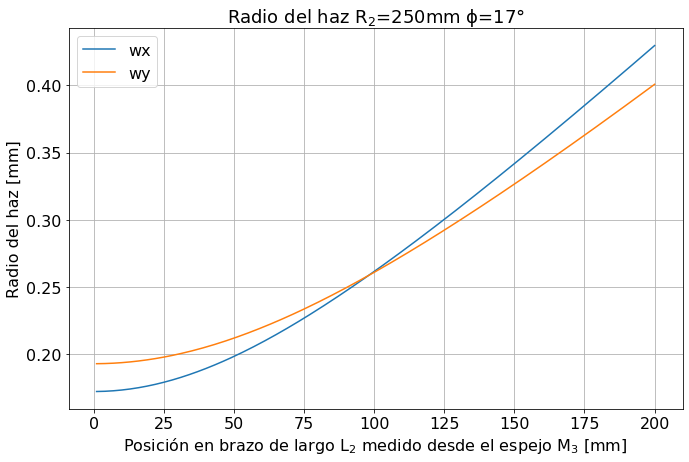

In [7]:
plt.plot(ll,wx,label="wx")
plt.plot(ll,wy,label="wy") 
plt.legend(loc='best')
plt.xlabel("Posición en brazo de largo $L_2$ medido desde el espejo $M_3$ [mm]",size="16")
plt.ylabel("Radio del haz [mm]",size="16")
plt.title("Radio del haz $R_2$=250mm $\phi$=17°", size='18')
plt.grid(True)
plt.savefig("radio_r25", dpi=300)

### Simulación para angulos desde 17 hasta 24

In [8]:
#Se inicializa las variables donde se van a guardar los resultados para cada angulo
wx_t, wy_t= [],[]
#ll es un array que simboliza todos los puntos a lo largo del segundo brazo donde queremos calcular el ancho
camino_xf = camino_x.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2)])
camino_yf = camino_y.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2)])
for i in range(34,49,2):
    ctita= i*3.14/180
    wx,wy = [],[]
    #Se reemplaza en los roundtrips x e y las variables de la simulacion
    AA_x,BB_x,CC_x,DD_x= sp.simplify(camino_xf.subs([(tita,ctita)]))
    AA_y,BB_y,CC_y,DD_y= sp.simplify(camino_yf.subs([(tita,ctita)]))
    #Para cada punto de ll se calcula el valor del ancho
    for lll in ll:
        wx.append(w(lll, AA_x,BB_x,CC_x,DD_x))
        wy.append(w(lll, AA_y,BB_y,CC_y,DD_y))
    wx_t.append(wx)
    wy_t.append(wy)    

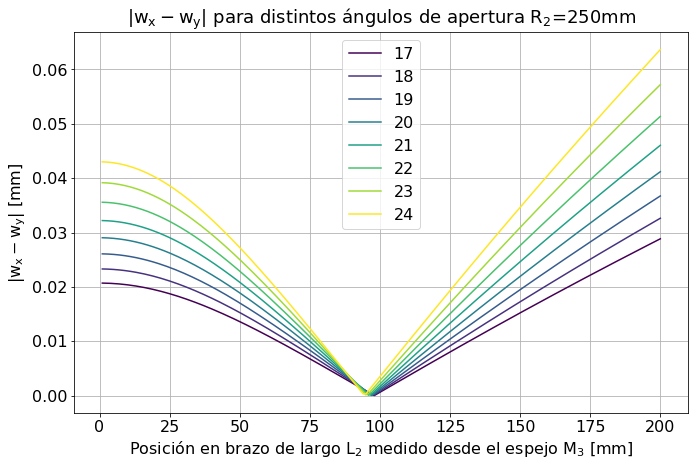

In [9]:
for i in range(8):
    graficar(wx_t[i],wy_t[i],i)
plt.title("|$w_x-w_y$| para distintos ángulos de apertura $R_2$=250mm",size="18")
plt.xlabel("Posición en brazo de largo $L_2$ medido desde el espejo $M_3$ [mm]",size="16")
plt.ylabel("|$w_x-w_y$| [mm]",size="16")
plt.savefig("valor_abs_r25",dpi=300)

## Simulación para $R_2=200mm$

In [10]:
cD = 2
cn_1 = 1.958
cR_2= 200
cL_2= 150
cL_1= 200
wx_t, wy_t= [],[]
ll = np.linspace(1,150, 150)

### Simulacion para $\phi=17°$

In [11]:
wx = []
wy = []
AA_x,BB_x,CC_x,DD_x= sp.simplify(camino_x.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
AA_y,BB_y,CC_y,DD_y= sp.simplify(camino_y.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
for lll in ll:
    wx.append(w(lll, AA_x,BB_x,CC_x,DD_x))
    wy.append(w(lll, AA_y,BB_y,CC_y,DD_y))

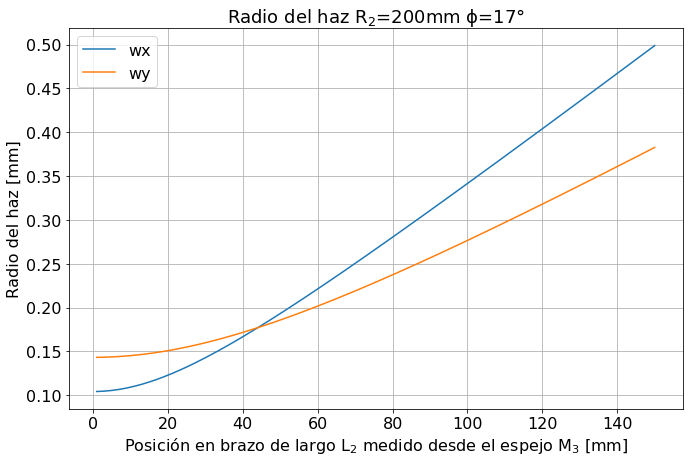

In [12]:
plt.plot(ll,wx,label="wx")
plt.plot(ll,wy,label="wy") 
plt.legend(loc='best')
plt.xlabel("Posición en brazo de largo $L_2$ medido desde el espejo $M_3$ [mm]",size="16")
plt.ylabel("Radio del haz [mm]",size="16")
plt.title("Radio del haz $R_2$=200mm $\phi$=17°", size="18")
plt.grid(True)
plt.savefig("radio_r20", dpi=300)

### Simulación para angulos desde 17° hasta 24°

In [13]:
camino_xf = camino_x.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2)])
camino_yf = camino_y.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2)])
for i in range(34,49,2):
    ctita= i*3.14/180
    wx,wy = [],[]
    #Se reemplaza en los roundtrips x e y las variables de la simulacion
    AA_x,BB_x,CC_x,DD_x= sp.simplify(camino_xf.subs([(tita,ctita)]))
    AA_y,BB_y,CC_y,DD_y= sp.simplify(camino_yf.subs([(tita,ctita)]))
    #Para cada punto de ll se calcula el valor del ancho
    for lll in ll:
        wx.append(w(lll, AA_x,BB_x,CC_x,DD_x))
        wy.append(w(lll, AA_y,BB_y,CC_y,DD_y))
    wx_t.append(wx)
    wy_t.append(wy)

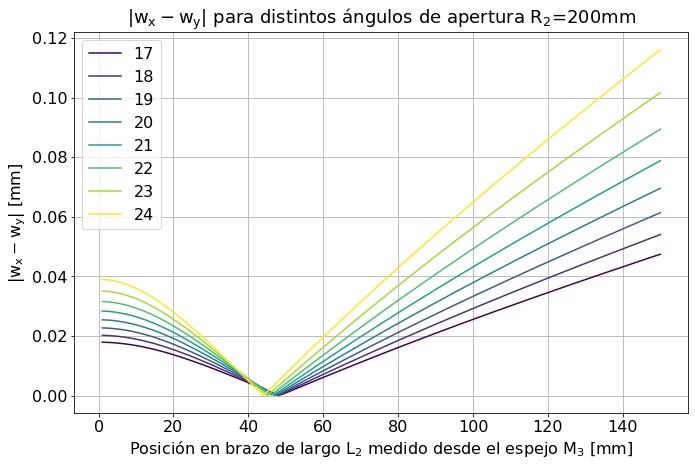

In [14]:
for i in range(8):
    graficar(wx_t[i],wy_t[i],i)
plt.title("|$w_x-w_y$| para distintos ángulos de apertura $R_2$=200mm",size="18")
plt.xlabel("Posición en brazo de largo $L_2$ medido desde el espejo $M_3$ [mm]",size="16")
plt.ylabel("|$w_x-w_y$| [mm]",size="16")
plt.savefig("valor_abs_r25",dpi=300)